# Project: Investigate TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### Questions to answer

<li>what is the most produced genre year to year?
<li>what is the highest voted genre year to year?
<li>What is the relation between vote ratings and profit? between budget and profit?
<li>what is the average runtime?
<li>what is the amount of movies produced over the years?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info() #taking a look at the info of the df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.head() #taking a look at a sample of the df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe() #taking a look at the statistics of the df

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


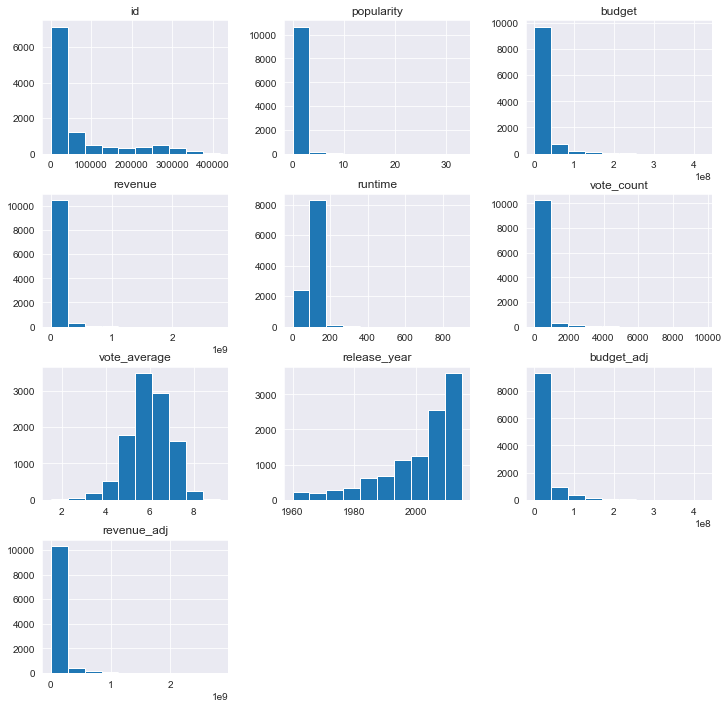

In [5]:
df.hist(figsize=(12,12)); #taking a look at the data of the df through histograms

In [6]:
df.duplicated().sum() #checking for dupicated rows

1

#### Observations
<li>columns like (imdb_id,homepage,tagline,keywords,overview) are irrelevant to our analysis and need to be dropped
<li>columns like (cast,director,production_companies,genres,) got more than one value separated by "|" and need to be separated into different columns
<li>only 1 duplicated row
<li>there isn't many NaN values in the most important columns though df.describe() and histograms showed alot of 0 values
<li>the release_date column are the wrong type


### Data Cleaning 

In [7]:
#adding a new adjusted profit column
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

In [8]:
#dropping irrelevant columns
df.drop(['imdb_id','homepage','tagline','keywords','overview'],axis=1,inplace=True)
#dropping duplicated rows
df.drop_duplicates(inplace=True)

In [9]:
#Replacing the 0 values with numpy.NaN 
df.replace(0, np.nan, inplace=True)


In [10]:
#Dropping rows with NaN values
df.dropna(axis=0,inplace=True)

In [11]:
#changing release_date data type to date-time
df.release_date = pd.to_datetime(df['release_date'])

In [12]:
df.info() #performing a check on non null values and columns data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3802 non-null   int64         
 1   popularity            3802 non-null   float64       
 2   budget                3802 non-null   float64       
 3   revenue               3802 non-null   float64       
 4   original_title        3802 non-null   object        
 5   cast                  3802 non-null   object        
 6   director              3802 non-null   object        
 7   runtime               3802 non-null   float64       
 8   genres                3802 non-null   object        
 9   production_companies  3802 non-null   object        
 10  release_date          3802 non-null   datetime64[ns]
 11  vote_count            3802 non-null   int64         
 12  vote_average          3802 non-null   float64       
 13  release_year     

In [13]:
df.duplicated().sum() #performing a check on duplicated rows

0

In [14]:
#spliting columns with more than one value
df1=df['cast'].str.split('|',expand=True).rename(columns=lambda x: "cast_{}".format(x+1))
df2=df['director'].str.split('|',expand=True).rename(columns=lambda x: "director_{}".format(x+1))
df3=df['genres'].str.split('|',expand=True).rename(columns=lambda x: "genres_{}".format(x+1))
df4=df['production_companies'].str.split('|',expand=True).rename(columns=lambda x: "production_companies_{}".format(x+1))
df = df.join([df1,df2,df3,df4])
df.drop(['cast','director','genres','production_companies'],axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### what is the most produced genre year to year?

In [15]:
#creatinga new df of genres in my data to research it for the most produced and the highest voted genres year by year
df_genres = df.loc[:,'genres_1':'genres_5'].join(df['release_year']) #creates a 
df_genres.head()

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year
0,Action,Adventure,Science Fiction,Thriller,None,2015
1,Action,Adventure,Science Fiction,Thriller,None,2015
2,Adventure,Science Fiction,Thriller,None,None,2015
3,Action,Adventure,Science Fiction,Fantasy,None,2015
4,Action,Crime,Thriller,None,None,2015


In [16]:
years = df['release_year'].unique() #creates an array of the years in release_year column
most_common_genre=[] 

#a for loop to iterate through the df_genres df and create the most common genre list
for year in years:   
    df1 = df_genres[df_genres['release_year'] == year].drop(['release_year'], axis = 1) #creats a new df with genres filtered by the year
    common_genre = df1.stack().value_counts().idxmax() #stacks the new df together and finds out the most common genre
    
    
    most_common_genre.append((year, common_genre))
    
df_most_popular_genre = pd.DataFrame(most_common_genre, columns=['release_year', 'most_common_genre']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular_genre

,release_year,most_common_genre
0,1960,Drama
1,1961,Drama
2,1962,Drama
3,1963,Thriller
4,1964,Drama
5,1965,Drama
6,1966,Drama
7,1967,Drama
8,1968,Drama
9,1969,Western


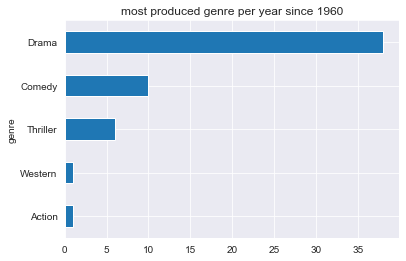

In [17]:
df_most_popular_genre['most_common_genre'].value_counts().sort_values().plot(kind = 'barh', title ='most produced genre per year since 1960',ylabel='genre');

In [18]:
df_most_popular_genre['most_common_genre'].value_counts()

Drama       38
Comedy      10
Thriller     6
Action       1
Western      1
Name: most_common_genre, dtype: int64

### what is the highest voted genre year to year?

In [19]:
most_voted_genre=[] 

#a for loop to iterate through the df_genres df and create the most common genre list
for year in years:   
    df1 = df[df['release_year'] == year]  #filters the main df by the year
    voted_genre = df1.groupby(['genres_1'])['vote_average'].mean().idxmax() #looks up the genre with the highest vote average in df2
    most_voted_genre.append((year,voted_genre))
    
df_most_voted_genre = pd.DataFrame(most_voted_genre, columns=['release_year', 'most_voted_genre']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_voted_genre

,release_year,most_voted_genre
0,1960,Drama
1,1961,Action
2,1962,Crime
3,1963,Adventure
4,1964,Crime
5,1965,Drama
6,1966,Drama
7,1967,Crime
8,1968,Science Fiction
9,1969,Drama


### The highest average voted genre yearly

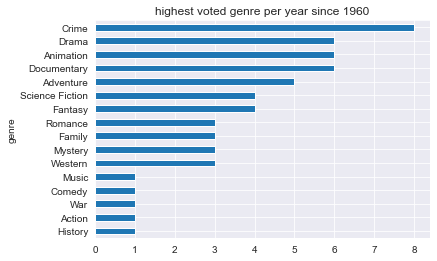

In [20]:
most_voted_counts = df_most_voted_genre['most_voted_genre'].value_counts()
most_voted_counts.sort_values().plot(kind = 'barh', title ='highest voted genre per year since 1960',ylabel='genre');

In [21]:
most_voted_counts

Crime              8
Documentary        6
Animation          6
Drama              6
Adventure          5
Fantasy            4
Science Fiction    4
Western            3
Mystery            3
Family             3
Romance            3
History            1
Action             1
War                1
Comedy             1
Music              1
Name: most_voted_genre, dtype: int64

### What is the relation between vote ratings and profit? between budget and profit?

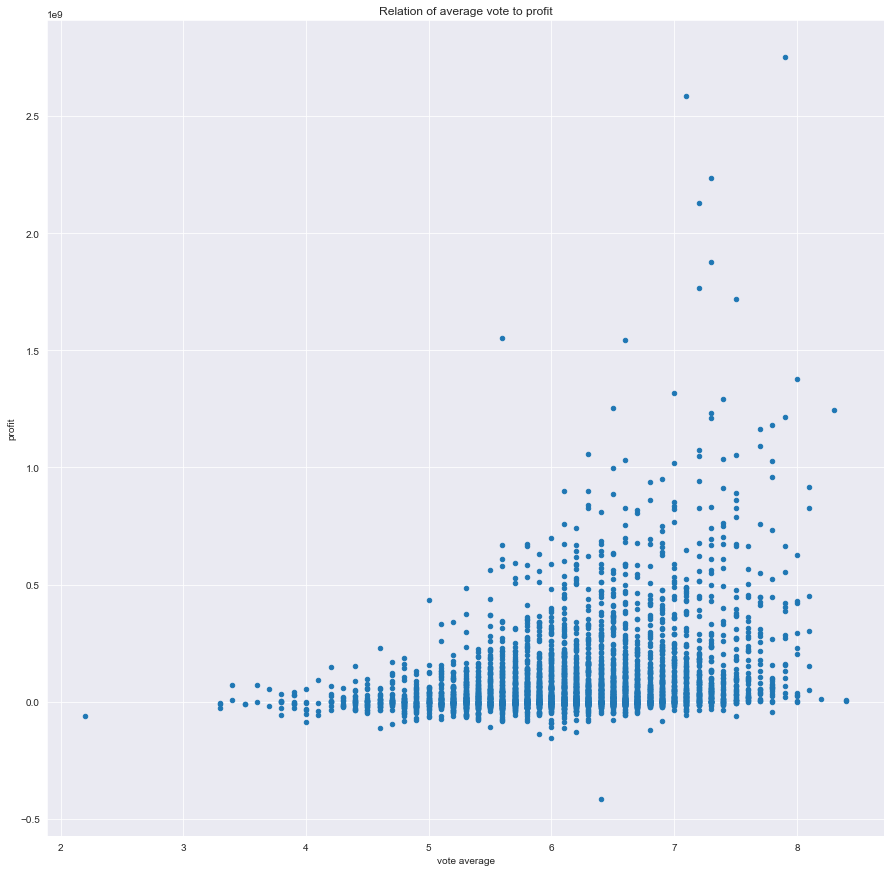

In [22]:
df.plot(x='vote_average', y='profit_adj', kind='scatter',title ='Relation of average vote to profit',ylabel='profit',xlabel='vote average',figsize=(15,15));

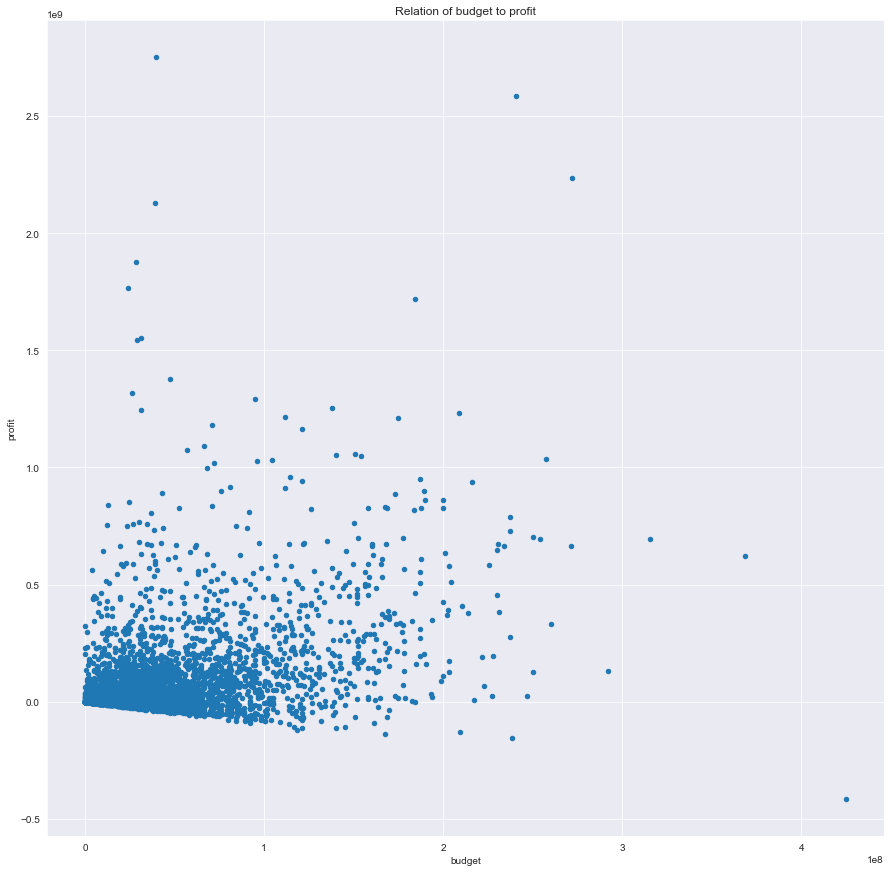

In [23]:
df.plot(x='budget_adj', y='profit_adj', kind='scatter',title ='Relation of budget to profit',ylabel='profit',xlabel='budget',figsize=(15,15));

### What is the average runtime?

In [24]:
runtime_avg = df['runtime'].mean() #average runtime of movies
runtime_avg

109.34797475013151

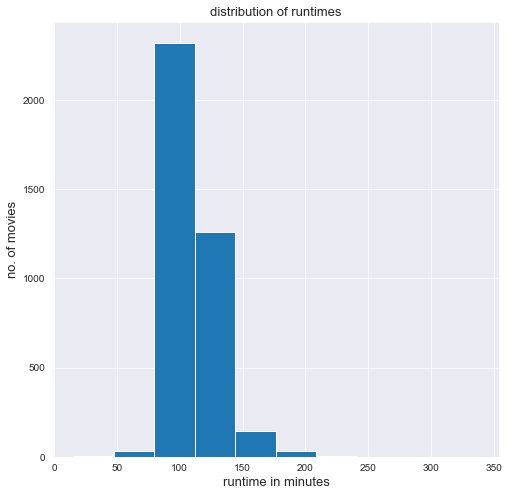

In [25]:
plt.hist(df['runtime'])
plt.gcf().set_size_inches(8, 8)
plt.xlabel('runtime in minutes',fontsize=13)
plt.ylabel('no. of movies', fontsize=13)
plt.title('distribution of runtimes', fontsize=13);

### what is the amount of movies produced over the years?

In [26]:
years.sort(axis=-1, kind='quicksort', order=None) #sorts the list (year) ascending

In [27]:
count_list =[]
# a forloop to append a tuple of the amount of movies produced every year to count_list list
for year in years:
    df1 = df_genres[df_genres['release_year'] == year]
    count = df1['genres_1'].count()
    count_list.append((year,count))
df_count = pd.DataFrame(count_list,columns=['year','count'])


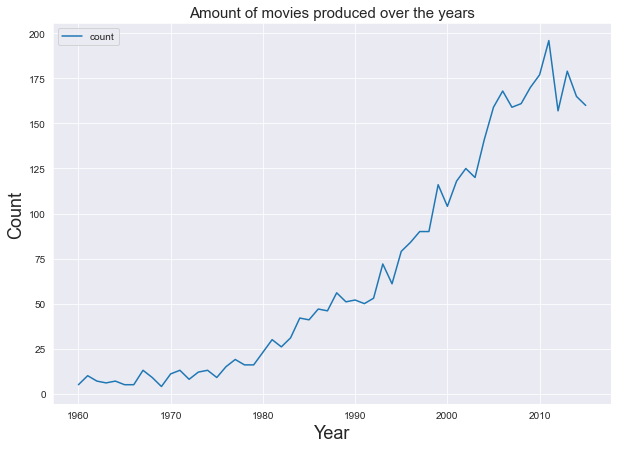

In [28]:
df_count.plot(x='year',y='count',figsize=(10,7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Amount of movies produced over the years', fontsize=15);

<a id='conclusions'></a>
## Conclusions



>Drama is dominating as the most popular(produced) genre over the span of the last 60 years

>Crime got the highest average votes per year with 8 years though not high quantity of crime production but getting high average vote ratings

>the coorelation between the vote rating and profit is alot stronger than betweenbudget and profit

>the average runtime of the movies is 109.35 minutes

>the amount of movies produced over the years had ahigh trend of increasing while taking a small dip after 2011

## P.S.
a big portion of the data was dropped inorder to avoid affecting the results due to the 0 values filling the data so the analysis might not be error proof.